In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import copy
import math

In [2]:
import time
def format_time(seconds):
    return "{:.10f}".format(seconds)

In [3]:
def is_feasible(solution, graph):
    for node in graph:
        for neighbor in graph[node]:
            if solution[node] == solution[neighbor]:
                return False
    return True

def calc_solution_value(solution, graph):
    conflicts = 0
    for node in graph:
        for neighbor in graph[node]:
            if solution[node] == solution[neighbor]:
                conflicts += 1
    return conflicts // 2

def initialize(graph):
    num_colors = len(graph)  # Number of nodes in the graph
    colors = list(range(num_colors))
    return {node: random.choice(colors) for node in graph}

def make_small_change(solution, graph):
    new_solution = copy.deepcopy(solution)
    node = random.choice(list(graph.nodes()))
    neighbor_colors = set(new_solution[neighbor] for neighbor in graph.neighbors(node))
    available_colors = [color for color in range(len(graph)) if color not in neighbor_colors]

    best_color = None
    min_conflicts = float('inf')
    for color in available_colors:
        new_solution[node] = color
        conflicts = calc_solution_value(new_solution, graph)
        if conflicts < min_conflicts:
            min_conflicts = conflicts
            best_color = color
    new_solution[node] = best_color
    return new_solution

def simulated_annealing(graph, num_iters, cooling_rate):
    solution = initialize(graph)
    value = calc_solution_value(solution, graph)
    best_solution = copy.deepcopy(solution)
    best_value = value
    
    values = [None for _ in range(num_iters)]
    for i in range(1, num_iters + 1):
        new_solution = make_small_change(solution, graph)
        new_value = calc_solution_value(new_solution, graph)
        delta_E = new_value - value
        
        if delta_E < 0 or random.random() < math.exp(-delta_E / cooling_rate):
            value = new_value
            solution = copy.deepcopy(new_solution)
            if new_value <= best_value:
                best_value = new_value
                best_solution = copy.deepcopy(new_solution)
        
        values[i - 1] = value

        num_colors_used = len(set(best_solution.values()))
        # print(f"Iteration: {i}, Num colors used: {num_colors_used}, Conflict: {value}")
        
    if is_feasible(best_solution,graph):
        print("Best Solution:")
        for node, color in best_solution.items():
            print(f"Node {node}: Color {color}")
        print("Best Conflict:", best_value)
    
        num_colors_used = len(set(best_solution.values()))
        print("Number of colors used:", num_colors_used)
    
        G = nx.Graph()
        for node in graph:
            for neighbor in graph[node]:
                G.add_edge(node, neighbor)
    
        pos = nx.spring_layout(G)  
        node_colors = [best_solution[node] for node in graph]  
    
        plt.figure(figsize=(8, 8))
        nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
        plt.title('Graph Coloring')
        plt.show()
    else:
        print("Solution not found")


    return num_colors_used, best_value

def convert_dict_to_networkx(graph_dict):
    graph = nx.Graph()
    for node, neighbors in graph_dict.items():
        for neighbor in neighbors:
            graph.add_edge(node, neighbor)
    return graph


Best Solution:
Node A: Color 0
Node B: Color 2
Node C: Color 1
Node D: Color 0
Best Conflict: 0
Number of colors used: 3


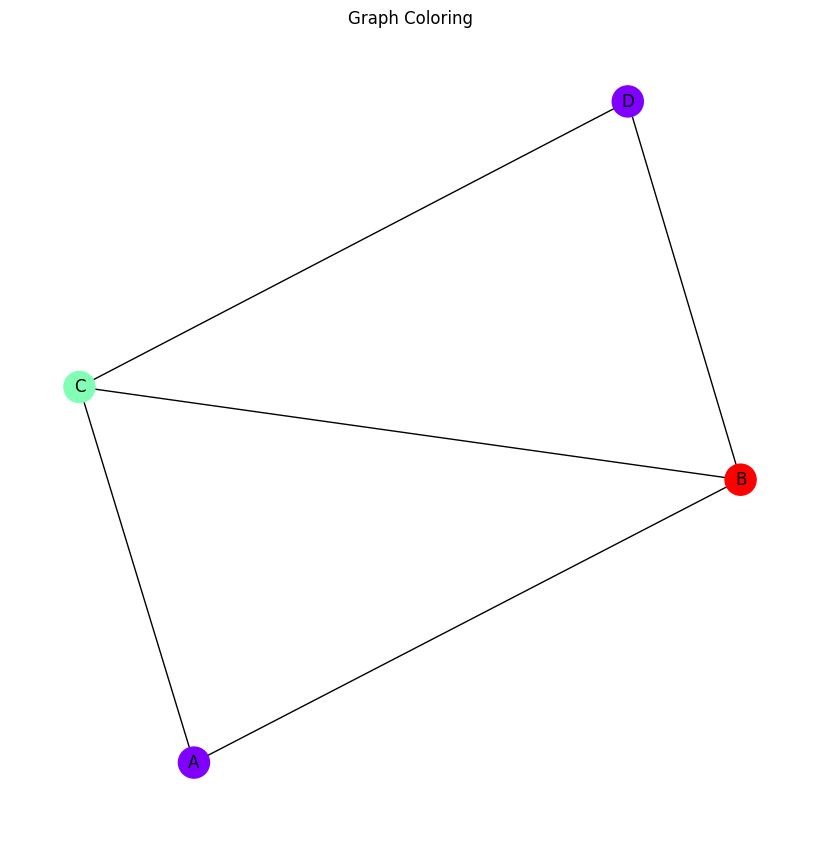

Execution time: 0.14513087272644043 seconds


In [4]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

num_iters = 500
cooling_rate = 0.002

graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small_1")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(format_time(end_time - start_time))+" sekundi")

with open("../Rezultati/simulated_annealing.txt", "w") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")
podaci.clear()

In [5]:
def appendToFile(filename,num_colors_used,elapsed_time):
    podaci.append(filename+".txt")
    podaci.append("Broj boja: "+str(num_colors_used))
    podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

    
    with open("../Rezultati/simulated_annealing.txt", "a") as fajl:
        for podatak in podaci:
                fajl.write(f"{podatak}\n")

    podaci.clear()

Best Solution:
Node A: Color 1
Node B: Color 0
Node C: Color 3
Node D: Color 4
Node E: Color 1
Node F: Color 2
Node G: Color 2
Node H: Color 1
Node I: Color 0
Node J: Color 0
Best Conflict: 0
Number of colors used: 5


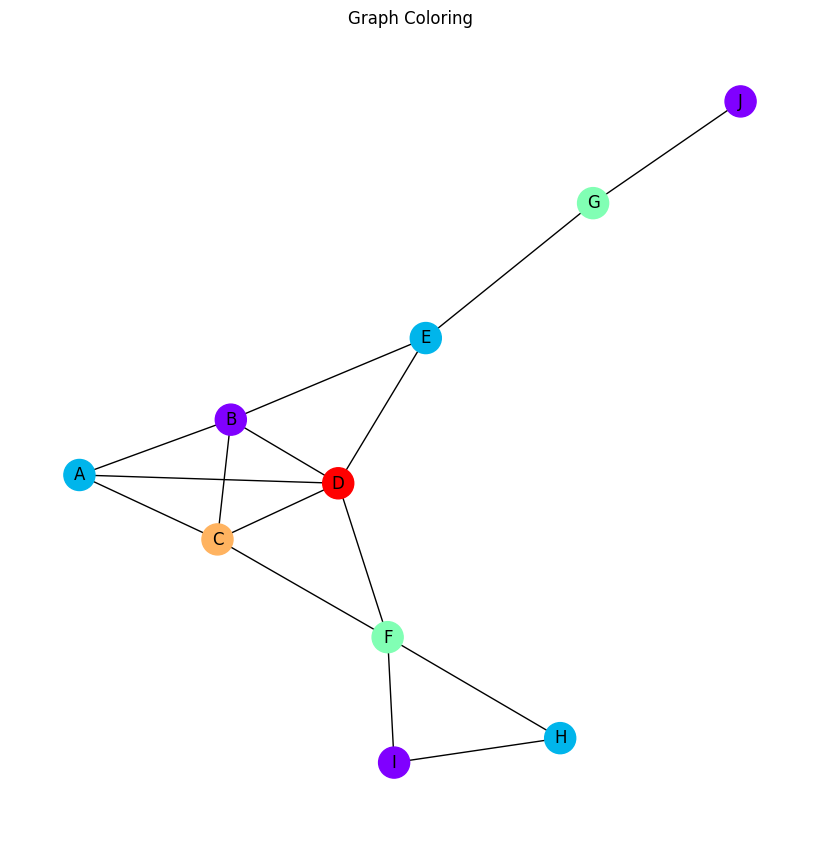

Execution time: 0.28642773628234863 seconds


In [6]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}
graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("small_2", num_colors_used,format_time(end_time - start_time))

Best Solution:
Node A: Color 3
Node B: Color 2
Node C: Color 0
Node D: Color 1
Node E: Color 2
Best Conflict: 0
Number of colors used: 4


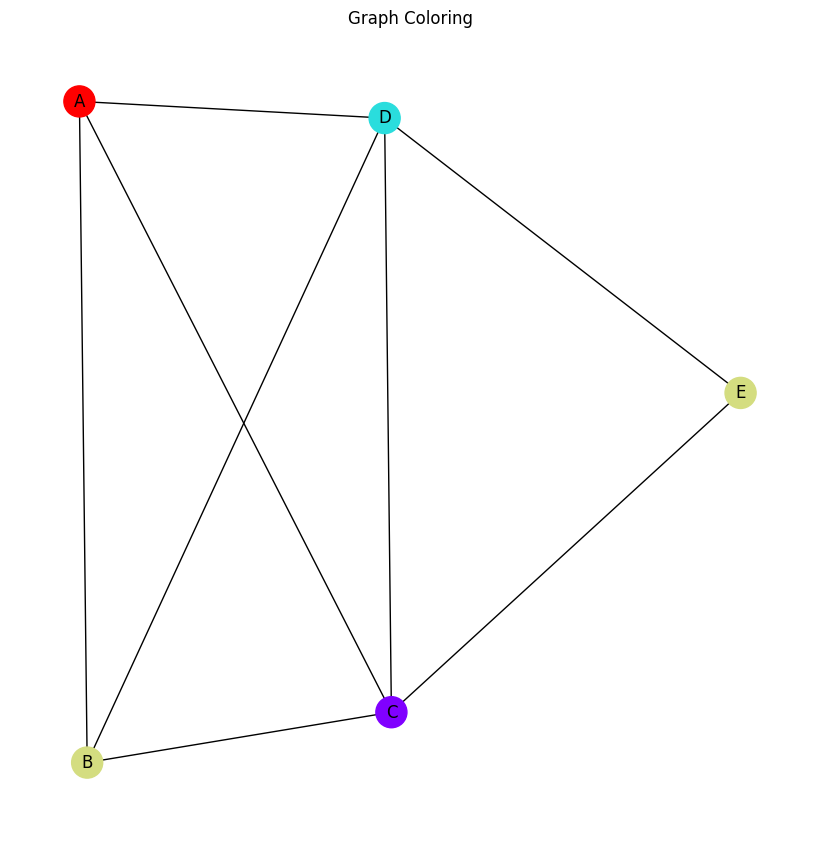

Execution time: 0.21741938591003418 seconds


In [7]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'B', 'C', 'E'],
    'E': ['C', 'D']
}
graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("small_3", num_colors_used,format_time(end_time - start_time))

Best Solution:
Node A: Color 0
Node B: Color 2
Node C: Color 1
Node D: Color 0
Node E: Color 0
Best Conflict: 0
Number of colors used: 3


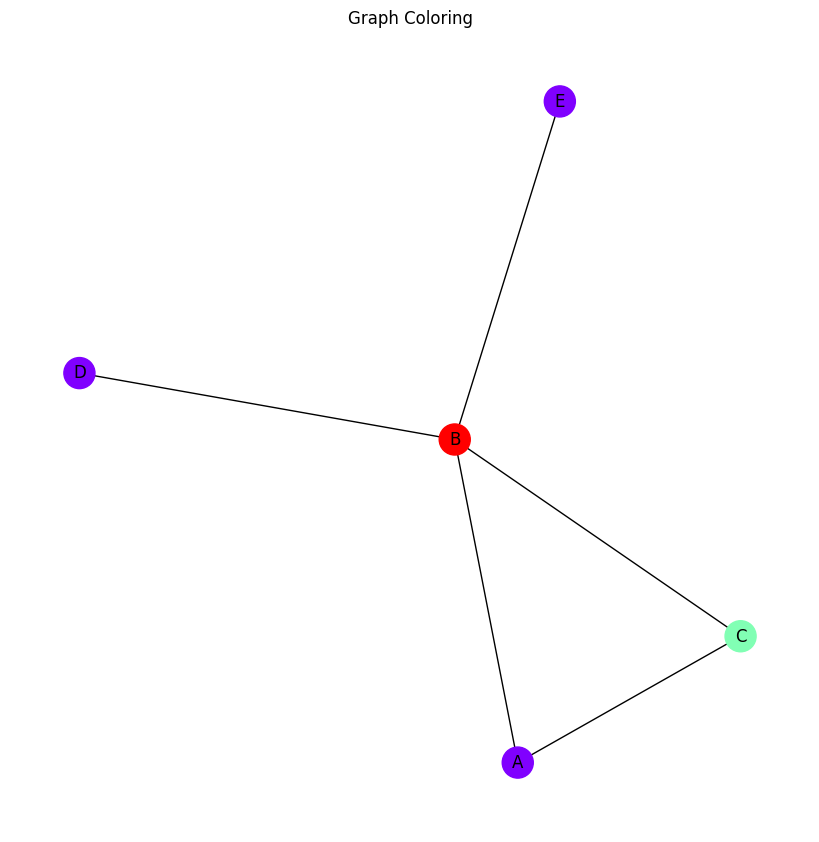

Execution time: 0.2790248394012451 seconds


In [8]:
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['A', 'B'],
    'D' : ['B'],
    'E' : ['B']
}
graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("small_4", num_colors_used,format_time(end_time - start_time))

Best Solution:
Node A: Color 2
Node B: Color 1
Node C: Color 0
Node D: Color 0
Node E: Color 1
Node G: Color 1
Node F: Color 2
Best Conflict: 0
Number of colors used: 3


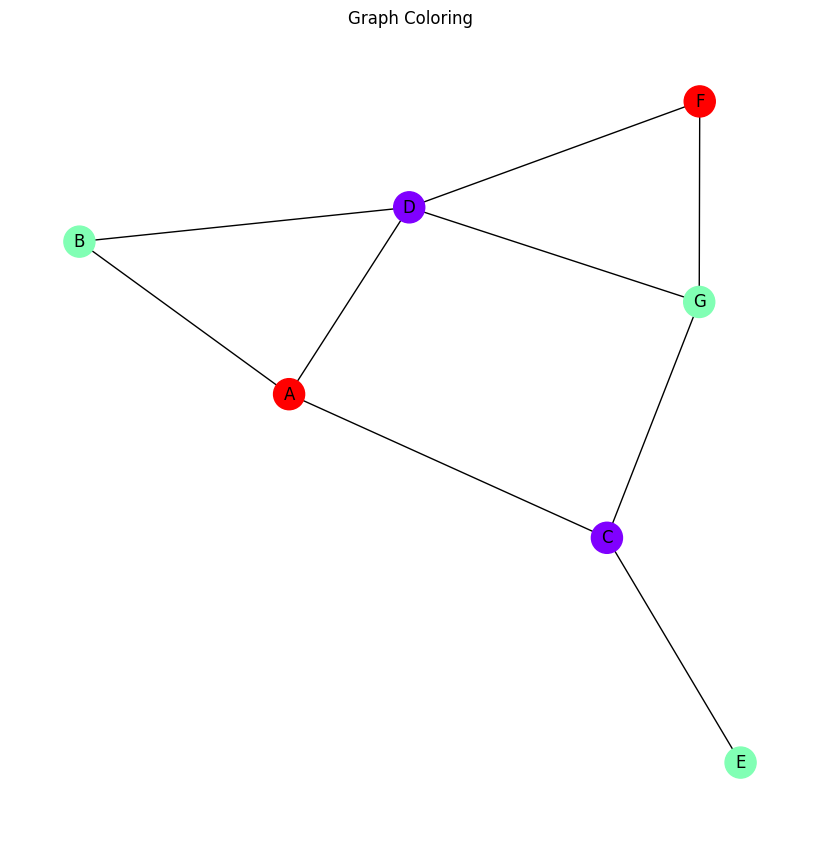

Execution time: 0.318835973739624 seconds


In [9]:
#small 5
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'G'],
    'D': ['A', 'B', 'F', 'G'],
    'E': ['C'],
    'F': ['D', 'G'],
    'G': ['C', 'D', 'F']
}
graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("small_5", num_colors_used,format_time(end_time - start_time))

Best Solution:
Node A: Color 3
Node B: Color 0
Node F: Color 5
Node D: Color 2
Node E: Color 4
Node C: Color 1
Best Conflict: 0
Number of colors used: 6


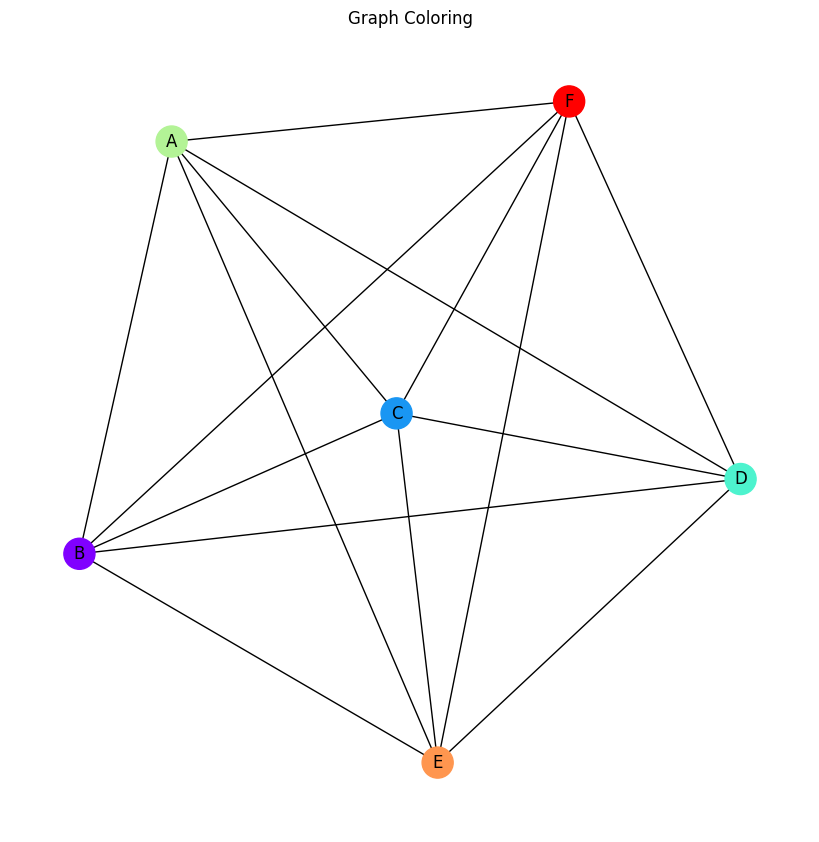

Execution time: 0.21988320350646973 seconds


In [10]:
#small 6
graph = {
    'A': ['B', 'F', 'D', 'E'],
    'B': ['A', 'C', 'E', 'F'],
    'C': ['B', 'D', 'F', 'A'],
    'D': ['C', 'E', 'A', 'B'],
    'E': ['D', 'F', 'B', 'C'],
    'F': ['E', 'A', 'C', 'D']
}

graph = convert_dict_to_networkx(graph)

start_time = time.time()
num_colors_used,_ = simulated_annealing(graph, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("small_6", num_colors_used,format_time(end_time - start_time))

In [11]:
def read_dimacs(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.strip().split()
                node1, node2 = int(node1), int(node2)
                G.add_edge(node1, node2)
    return G

Best Solution:
Node 1: Color 25
Node 2: Color 29
Node 3: Color 13
Node 4: Color 9
Node 5: Color 19
Node 6: Color 21
Node 7: Color 10
Node 8: Color 87
Node 9: Color 14
Node 10: Color 18
Node 11: Color 20
Node 12: Color 22
Node 13: Color 24
Node 14: Color 17
Node 15: Color 7
Node 16: Color 8
Node 33: Color 4
Node 36: Color 11
Node 41: Color 6
Node 43: Color 3
Node 45: Color 15
Node 47: Color 2
Node 48: Color 5
Node 51: Color 28
Node 54: Color 27
Node 56: Color 2
Node 57: Color 4
Node 59: Color 1
Node 60: Color 12
Node 61: Color 16
Node 70: Color 0
Node 71: Color 0
Node 72: Color 0
Node 73: Color 0
Node 74: Color 0
Node 75: Color 0
Node 76: Color 0
Node 77: Color 0
Node 78: Color 0
Node 80: Color 0
Node 82: Color 0
Node 85: Color 0
Node 87: Color 0
Node 89: Color 0
Node 90: Color 1
Node 91: Color 0
Node 95: Color 0
Node 97: Color 0
Node 102: Color 0
Node 103: Color 0
Node 104: Color 108
Node 105: Color 0
Node 106: Color 0
Node 113: Color 147
Node 116: Color 2
Node 117: Color 0
Node 118: C

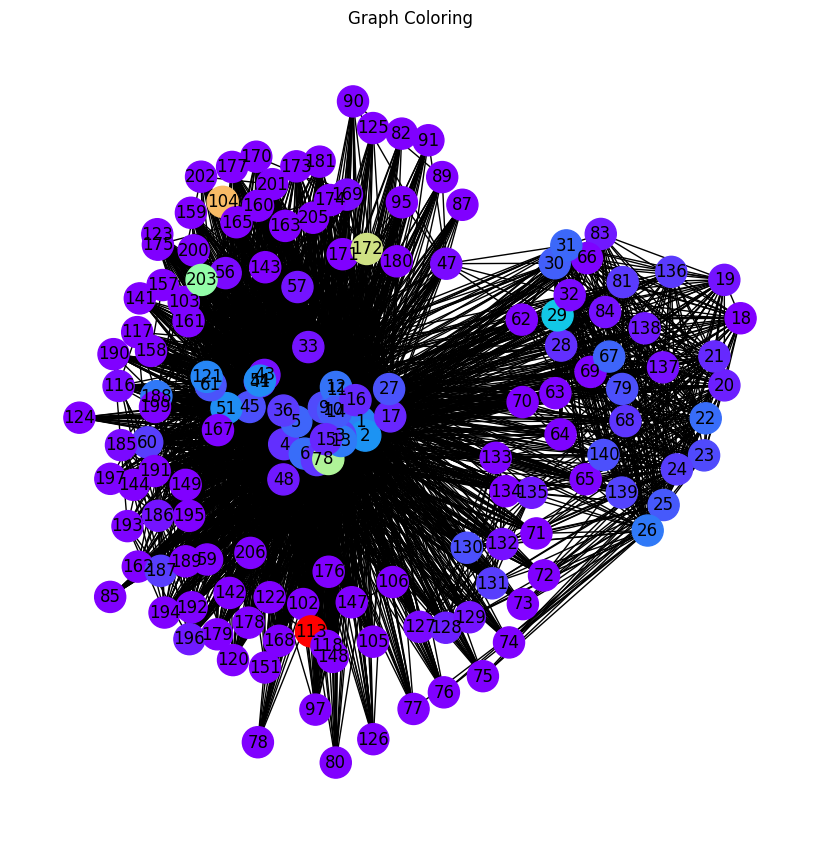

Execution time: 19.001907110214233 seconds


In [12]:
filename = '../File/fajl2.txt'

G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("fajl2", num_colors_used,format_time(end_time - start_time))

Best Solution:
Node 1: Color 3
Node 2: Color 8
Node 4: Color 1
Node 7: Color 4
Node 9: Color 4
Node 13: Color 6
Node 15: Color 1
Node 18: Color 43
Node 20: Color 1
Node 25: Color 2
Node 27: Color 1
Node 30: Color 2
Node 32: Color 1
Node 36: Color 0
Node 38: Color 1
Node 41: Color 0
Node 43: Color 1
Node 49: Color 2
Node 51: Color 1
Node 54: Color 4
Node 56: Color 1
Node 60: Color 6
Node 62: Color 1
Node 65: Color 4
Node 67: Color 1
Node 72: Color 2
Node 74: Color 1
Node 77: Color 2
Node 79: Color 1
Node 83: Color 0
Node 85: Color 0
Node 88: Color 0
Node 90: Color 132
Node 97: Color 7
Node 99: Color 76
Node 102: Color 0
Node 104: Color 2
Node 108: Color 0
Node 110: Color 1
Node 113: Color 0
Node 115: Color 1
Node 120: Color 0
Node 122: Color 1
Node 125: Color 0
Node 127: Color 1
Node 131: Color 0
Node 133: Color 0
Node 136: Color 0
Node 138: Color 0
Node 144: Color 0
Node 146: Color 1
Node 149: Color 0
Node 151: Color 1
Node 155: Color 0
Node 157: Color 1
Node 160: Color 172
Node 162: C

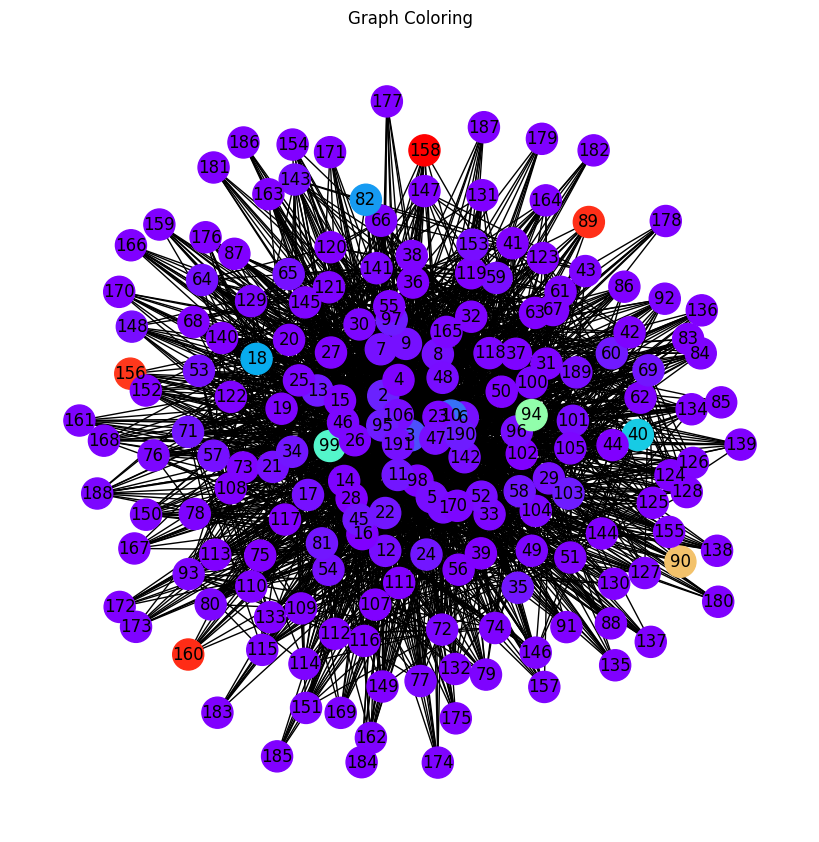

Execution time: 20.711909294128418 seconds


In [13]:
filename = '../File/myciel7.txt'

G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("myciel7", num_colors_used,format_time(end_time - start_time))


Best Solution:
Node 1: Color 1
Node 16: Color 4
Node 20: Color 4
Node 94: Color 3
Node 80: Color 0
Node 57: Color 0
Node 62: Color 2
Node 89: Color 3
Node 113: Color 2
Node 5: Color 4
Node 21: Color 3
Node 15: Color 2
Node 2: Color 2
Node 24: Color 5
Node 30: Color 0
Node 77: Color 1
Node 92: Color 7
Node 41: Color 3
Node 55: Color 7
Node 6: Color 6
Node 54: Color 3
Node 3: Color 7
Node 100: Color 3
Node 44: Color 6
Node 105: Color 8
Node 91: Color 4
Node 42: Color 1
Node 103: Color 0
Node 90: Color 3
Node 22: Color 5
Node 67: Color 2
Node 31: Color 5
Node 115: Color 4
Node 71: Color 4
Node 4: Color 2
Node 38: Color 5
Node 85: Color 3
Node 49: Color 1
Node 50: Color 5
Node 61: Color 6
Node 63: Color 7
Node 99: Color 0
Node 96: Color 4
Node 84: Color 0
Node 107: Color 3
Node 12: Color 5
Node 56: Color 3
Node 26: Color 0
Node 72: Color 1
Node 32: Color 2
Node 76: Color 7
Node 34: Color 6
Node 53: Color 5
Node 11: Color 1
Node 87: Color 5
Node 13: Color 2
Node 14: Color 0
Node 60: Color 4

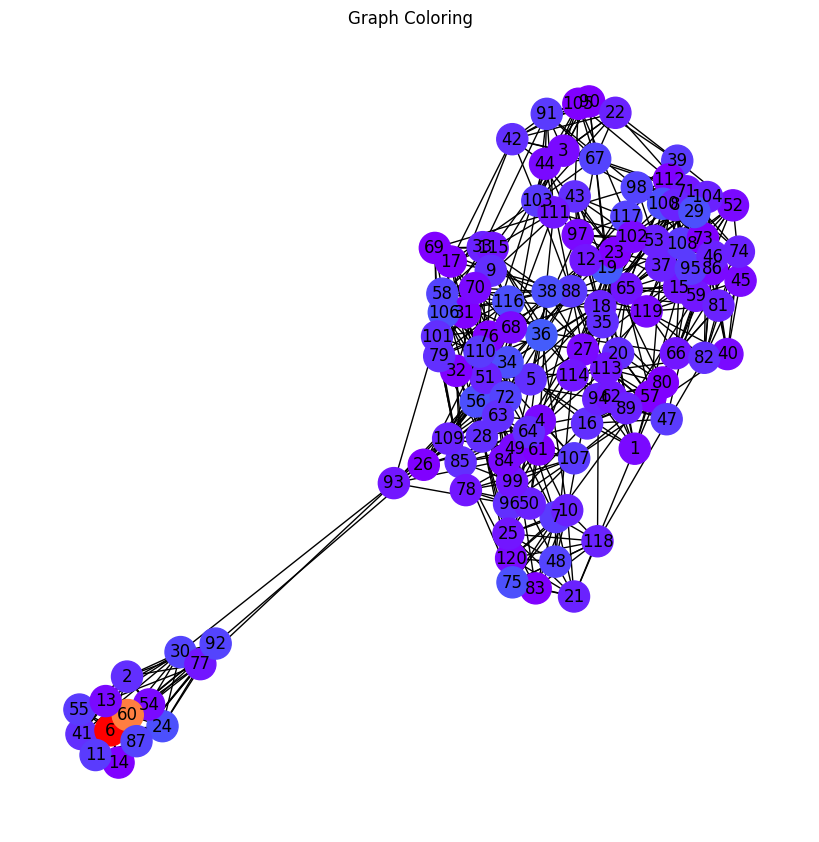

Execution time: 8.163432121276855 seconds


In [14]:
filename = '../File/games120.txt'

G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("games120", num_colors_used,format_time(end_time - start_time))

In [15]:
filename = ('../File/test1.txt') 
G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("test1", num_colors_used,format_time(end_time - start_time))

Solution not found
Execution time: 136.0618233680725 seconds


In [16]:
filename = ('../File/test2.txt') 
G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("test2", num_colors_used,format_time(end_time - start_time))

Solution not found
Execution time: 408.4514925479889 seconds


Best Solution:
Node 1: Color 0
Node 2: Color 2
Node 3: Color 1
Node 4: Color 0
Node 5: Color 1
Node 6: Color 0
Node 7: Color 1
Node 8: Color 0
Node 9: Color 1
Node 10: Color 0
Node 11: Color 1
Best Conflict: 0
Number of colors used: 3


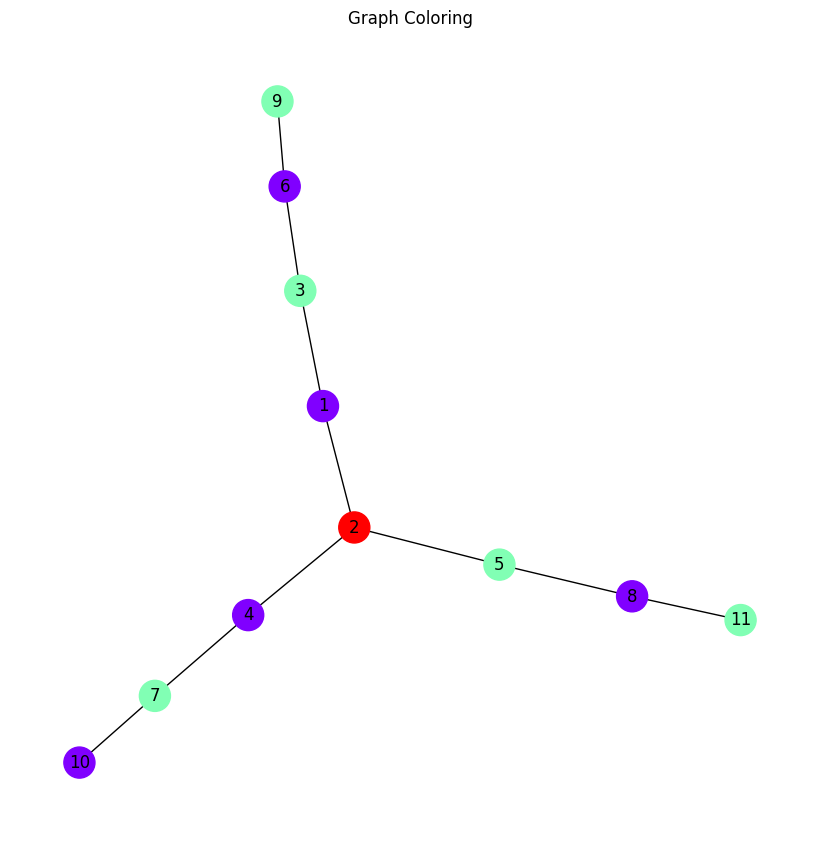

Execution time: 0.275921106338501 seconds


In [17]:
filename = ('../File/test4.txt') 
G = read_dimacs(filename)

start_time = time.time()
num_colors_used,_ = simulated_annealing(G, num_iters, cooling_rate)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

appendToFile("test4", num_colors_used,format_time(end_time - start_time))